In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import os


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Project-level imports.

In [2]:
from constants import guest_types
from constants import colors
from bootstrap import bootstrap
from bootstrap import thermodynamic_bootstrap
import plotting

# Load in results

In [3]:
from constants import systems

In [4]:
data_points = 2000000
alphas = [i for i in systems if i[0] == "a"]
aggregate_alpha_rmsd = np.empty(shape=(len(alphas), data_points, 2))

for index, system in enumerate(alphas):
        aggregate_alpha_rmsd[index] = np.genfromtxt(f"../smirnoff-host-guest-simulations-data/systems/{system}/smirnoff/r014/rmsd.dat")

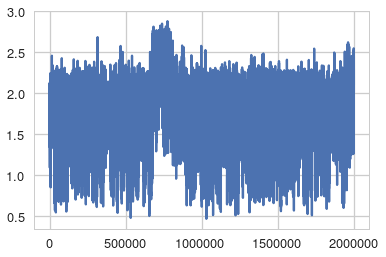

In [20]:
plt.plot(aggregate_alpha_rmsd[0, :, 0], aggregate_alpha_rmsd[0, :, 1])

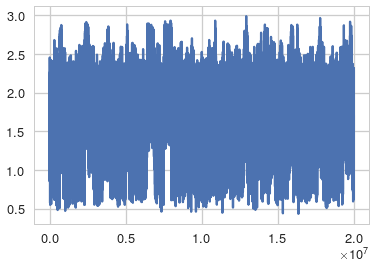

In [30]:
plt.plot(np.hstack(aggregate_alpha_rmsd[0:10, :, 1])

In [19]:
alphas = [i for i in systems if i[0] == "a"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(alphas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/smirnoff/r014/rmsd.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)

Text(0,0.5,'SMIRNOFF99Frosst $\\alpha$-cyclodextrin RMSD (\\AA)')

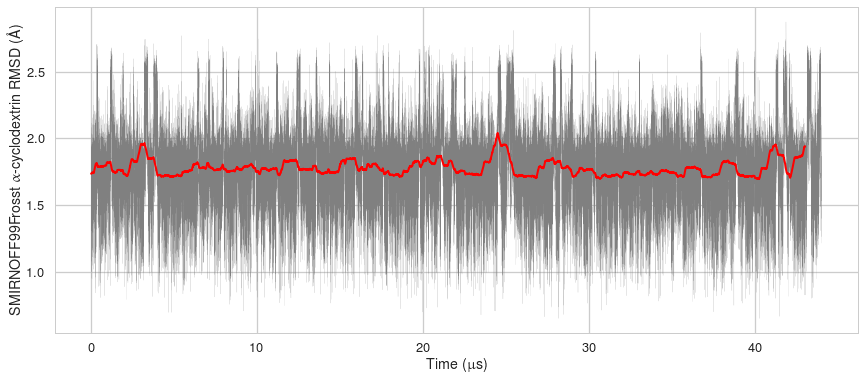

In [20]:
data = frame["[refstructure]"].values[::1000]
length = len(data)
time = 2e-9 * 250 * length * 1000

average = np.convolve(data, np.ones((2000,))/2000, mode="valid")
average_time = 2e-9 * 250 * len(average) * 1000

fig, ax = plt.subplots(1, figsize=(6 * 1.2 * 2, 6))
ax.plot(np.linspace(0, time, length), data, c="0.5", lw=0.1)
ax.plot(np.linspace(0, average_time, len(average)), average, lw=2, c="r")

ax.set_xlabel("Time ($\mu$s)")
ax.set_ylabel(r"SMIRNOFF99Frosst $\alpha$-cyclodextrin RMSD (\AA)")

In [5]:
betas = [i for i in systems if i[0] == "b"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(betas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/smirnoff/r014/rmsd.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

Text(0,0.5,'SMIRNOFF99Frosst $\\beta$-cyclodextrin RMSD (\\AA)')

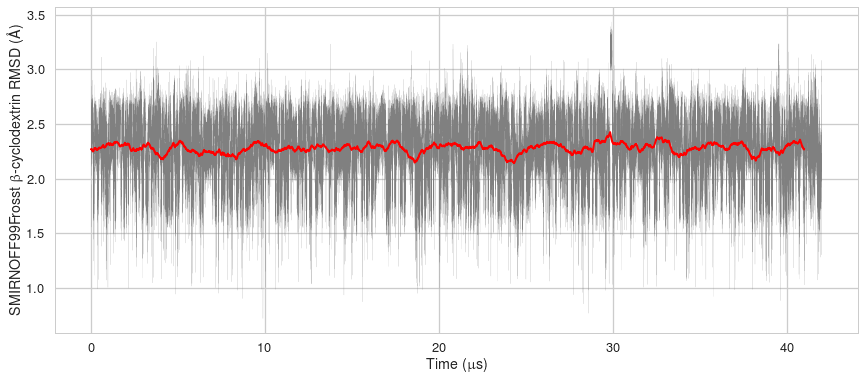

In [16]:
data = frame["[refstructure]"].values[::1000]
length = len(data)
time = 2e-9 * 250 * length * 1000

average = np.convolve(data, np.ones((2000,))/2000, mode="valid")
average_time = 2e-9 * 250 * len(average) * 1000

fig, ax = plt.subplots(1, figsize=(6 * 1.2 * 2, 6))
ax.plot(np.linspace(0, time, length), data, c="0.5", lw=0.1)
ax.plot(np.linspace(0, average_time, len(average)), average, lw=2, c="r")

ax.set_xlabel("Time ($\mu$s)")
ax.set_ylabel(r"SMIRNOFF99Frosst $\beta$-cyclodextrin RMSD (\AA)")

# BGBG-TIP3P

In [23]:
alphas = [i for i in systems if i[0] == "a"]
frame = pd.DataFrame()
list_ = []
for index, system in enumerate(alphas):
        df = pd.read_csv(f"../smirnoff-host-guest-simulations-data/systems/{system}/bgbg-tip3p/free-cyclodextrin-rmsd.dat", sep="\s+", header=0)
        list_.append(df)
frame = pd.concat(list_)

Text(0,0.5,'GAFF v1.7 $\\alpha$-cyclodextrin RMSD (\\AA)')

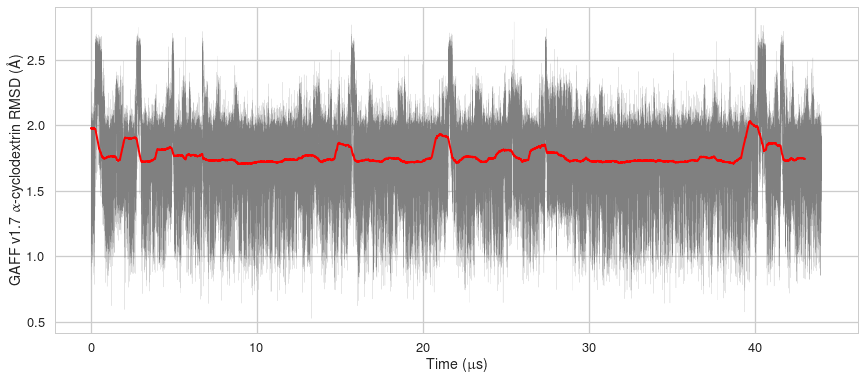

In [26]:
data = frame["[refstructure]"].values[::100]
length = len(data)
time = 4e-9 * 500 * length * 100

average = np.convolve(data, np.ones((5000,))/5000, mode="valid")
average_time = 4e-9 * 500 * len(average) * 100

fig, ax = plt.subplots(1, figsize=(6 * 1.2 * 2, 6))
ax.plot(np.linspace(0, time, length), data, c="0.5", lw=0.1)
ax.plot(np.linspace(0, average_time, len(average)), average, lw=2, c="r")

ax.set_xlabel("Time ($\mu$s)")
ax.set_ylabel(r"GAFF v1.7 $\alpha$-cyclodextrin RMSD (\AA)")